# Medidas de desempenho em classificação

## Matriz de Confusão

A matriz de confusão é uma ferramenta fundamental na avaliação de algoritmos de classificação. Ela organiza e resume as previsões feitas por um classificador em comparação com os rótulos reais, permitindo uma análise detalhada dos acertos e erros.

### Estrutura da Matriz de Confusão

Uma matriz de confusão é representada como uma tabela quadrada que organiza as previsões em quatro categorias principais:

- **Verdadeiro Positivo (VP)**: O classificador previu corretamente uma amostra como pertencente à classe positiva.
- **Verdadeiro Negativo (VN)**: O classificador previu corretamente uma amostra como pertencente à classe negativa.
- **Falso Positivo (FP)**: O classificador previu incorretamente uma amostra como pertencente à classe positiva, quando ela pertence à classe negativa (também conhecido como erro Tipo I).
- **Falso Negativo (FN)**: O classificador previu incorretamente uma amostra como pertencente à classe negativa, quando ela pertence à classe positiva (também conhecido como erro Tipo II).

Em um problema de duas classes, a matriz de confusão pode ser representada da seguinte maneira:

|               | **Classe Predita: Positivo** | **Classe Predita: Negativo** |
|---------------|------------------------------|------------------------------|
| **Classe Real: Positivo** | Verdadeiro Positivo (VP)    | Falso Negativo (FN)         |
| **Classe Real: Negativo** | Falso Positivo (FP)         | Verdadeiro Negativo (VN)    |

### Exemplo com o Dataset Iris

In [1]:
## Importando bibliotecas
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Carregando o dataset Iris
iris = load_iris()

# Criando um DataFrame para explorar os dados
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['target_name'] = df_iris['target'].apply(lambda x: iris.target_names[x])

Vamos simplificar o problema para apenas duas classes

In [3]:
df_iris['binary_target'] = df_iris['target'].apply(lambda x: 1 if x == 1 else 0)
df_iris["binary_target"].unique()

array([0, 1])

In [4]:
df_iris['binary_target'].value_counts()

binary_target
0    100
1     50
Name: count, dtype: int64

In [5]:
# Separando as variáveis independentes e dependentes
X = iris.data
y = df_iris['binary_target']

In [6]:
# Separando dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2)

In [7]:
# Treinando um classificador de Regressão Logística
model_bin = LogisticRegression()
model_bin.fit(X_train, y_train)

LogisticRegression()

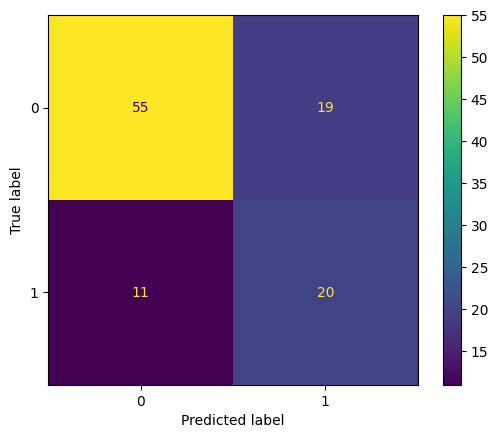

In [8]:
# Fazendo previsões no conjunto de teste
y_pred = model_bin.predict(X_test)

_ = ConfusionMatrixDisplay.from_estimator(model_bin, X_test, y_test)

## Acurácia

A **Acurácia** é a métrica mais simples e intuitiva, representando a proporção de previsões corretas feitas pelo classificador em relação ao total de previsões. Ela é dada pela fórmula:

$$
\text{Acurácia} = \frac{\text{Número de Previsões Corretas}}{\text{Número Total de Previsões}} = \frac{VP + VN}{VP + VN + FP + FN}
$$

Onde:
- **VP**: Verdadeiros Positivos (corretamente classificados como positivos)
- **VN**: Verdadeiros Negativos (corretamente classificados como negativos)
- **FP**: Falsos Positivos (incorretamente classificados como positivos)
- **FN**: Falsos Negativos (incorretamente classificados como negativos)

### Limitações da Acurácia

A acurácia pode ser enganosa quando lidamos com **classes desbalanceadas**. Se, por exemplo, 95% dos dados pertencem a uma única classe, um modelo que sempre prevê essa classe terá uma acurácia alta, mesmo que não seja eficaz na detecção da classe minoritária.

No caso de classificação binária com o **dataset Iris**, temos uma distribuição desbalanceada, com 100 amostras da classe 0 e 50 amostras da classe 1.

Se o modelo "chutasse" todas as previsões como  classe 0, ele ainda teria uma **acurácia** de quase 70%.

In [9]:
# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia: {accuracy:.2f}")


Acurácia: 0.71


## Precisão (Precision)

A **Precisão** (ou Precision) é uma métrica que mede a proporção de previsões positivas corretas feitas por um modelo de classificação. Ela é particularmente útil quando o custo de **falsos positivos** é alto, ou seja, quando é importante garantir que as previsões positivas sejam realmente precisas.

A fórmula da precisão é dada por:

$$
\text{Precisão} = \frac{\text{Verdadeiros Positivos (VP)}}{\text{Verdadeiros Positivos (VP)} + \text{Falsos Positivos (FP)}}
$$

A precisão responde à pergunta:

**"Entre todas as previsões positivas feitas pelo modelo, quantas estavam corretas?"**

### Exemplo com o Dataset Iris

In [10]:
# Calculando a precisão para a classe 1 (Não-Setosa)
precision = precision_score(y_test, y_pred)
print(f"Precisão (Classe 1): {precision:.2f}")

Precisão (Classe 1): 0.51


## Recall (Revocação)

A **Revocação** (ou Recall) é uma métrica que mede a capacidade do modelo de identificar corretamente todas as amostras positivas. Ela é particularmente útil quando o custo de **falsos negativos** é alto, ou seja, quando é importante garantir que o modelo consiga capturar todos os exemplos da classe positiva.

A fórmula da revocação é:

$$
\text{Revocação} = \frac{\text{Verdadeiros Positivos (VP)}}{\text{Verdadeiros Positivos (VP)} + \text{Falsos Negativos (FN)}}
$$

A revocação responde à pergunta:

**"Entre todas as amostras que realmente pertencem à classe positiva, quantas foram corretamente classificadas?"**


In [11]:
# Calculando a revocação para a classe 1 (Não-Setosa)
recall = recall_score(y_test, y_pred)
print(f"Revocação (Classe 1): {recall:.2f}")

Revocação (Classe 1): 0.65


## F1-Score

O **F1-Score** é uma métrica que combina as informações de **Precisão** e **Revocação** em uma única medida. Ele é particularmente útil em situações em que há um desbalanceamento entre as classes, e buscamos um equilíbrio entre a capacidade do modelo de identificar corretamente os positivos (Revocação) e de minimizar os falsos positivos (Precisão).

O **F1-Score** é calculado como a **média harmônica** entre a Precisão e a Revocação, e sua fórmula é:

$$
F1 = 2 \times \frac{\text{Precisão} \times \text{Revocação}}{\text{Precisão} + \text{Revocação}}
$$

### Interpretação

O **F1-Score** varia de 0 a 1, onde:
- **1** indica que o modelo tem alta Precisão e alta Revocação (um equilíbrio perfeito).
- **0** significa que o modelo falhou completamente.

O **F1-Score** é útil em casos onde temos classes desbalanceadas e precisamos garantir que o modelo tenha bom desempenho tanto em termos de detectar os positivos quanto em não cometer muitos erros ao classificá-los. 


In [12]:
# Calculando o F1-Score para a classe 1 (Não-Setosa)
f1 = f1_score(y_test, y_pred)
print(f"F1-Score (Classe 1): {f1:.2f}")

F1-Score (Classe 1): 0.57


## Como melhorar as medidas?

### O Corte do Classificador (Threshold)

Em um classificador binário, o modelo geralmente gera uma **probabilidade** de que uma amostra pertença a uma classe positiva ou negativa. O **corte** (ou threshold) é o valor a partir do qual o modelo decide se uma amostra pertence à classe positiva.

Por **padrão**, muitos classificadores utilizam um **corte de 0.5**, o que significa que:

- Se a probabilidade prevista pelo modelo for **maior ou igual a 0.5**, o exemplo é classificado como pertencente à **classe positiva** (classe `1`).
- Se a probabilidade prevista for **menor que 0.5**, o exemplo é classificado como pertencente à **classe negativa** (classe `0`).

Esse valor padrão de corte funciona bem em muitos casos, especialmente quando as classes estão balanceadas. No entanto, o ajuste desse corte pode influenciar drasticamente as métricas de desempenho, como precisão, revocação e F1-Score.

#### Impacto da Mudança do Corte

- **Aumento do corte (> 0.5)**: Quando o corte é aumentado, o classificador se torna mais conservador, ou seja, ele precisa de uma probabilidade maior para classificar uma amostra como pertencente à classe positiva. Isso pode:
  - **Aumentar a Precisão**: Haverá menos falsos positivos, pois o modelo é mais rigoroso ao classificar uma amostra como positiva.
  - **Diminuir a Revocação**: Algumas amostras positivas podem não atingir o corte elevado, resultando em mais falsos negativos.
  
- **Diminuição do corte (< 0.5)**: Quando o corte é reduzido, o classificador se torna mais permissivo, aceitando probabilidades mais baixas para classificar uma amostra como positiva. Isso pode:
  - **Aumentar a Revocação**: O modelo captura mais exemplos da classe positiva, reduzindo falsos negativos.
  - **Diminuir a Precisão**: Mais exemplos da classe negativa podem ser incorretamente classificados como positivos, resultando em mais falsos positivos.

In [13]:
# Gerando probabilidades de predição
y_prob = model_bin.predict_proba(X_test)[:, 1]

(array([10., 10., 13., 16.,  8., 13., 12., 11.,  5.,  7.]),
 array([0.08106243, 0.15343398, 0.22580553, 0.29817709, 0.37054864,
        0.44292019, 0.51529174, 0.58766329, 0.66003485, 0.7324064 ,
        0.80477795]),
 <BarContainer object of 10 artists>)

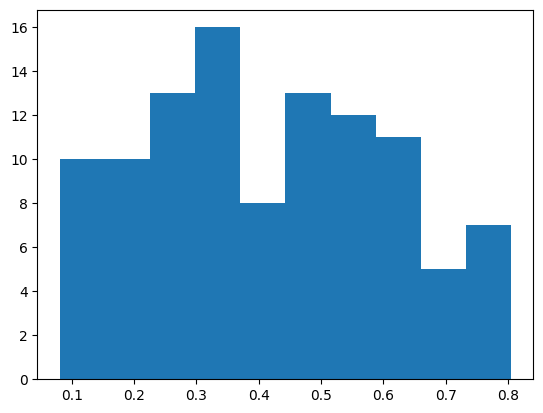

In [14]:
plt.hist(y_prob)

/home/thiagorr/.cache/pypoetry/virtualenvs/prog-stat-5bravkBa-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thiagorr/.cache/pypoetry/virtualenvs/prog-stat-5bravkBa-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thiagorr/.cache/pypoetry/virtualenvs/prog-stat-5bravkBa-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` paramete

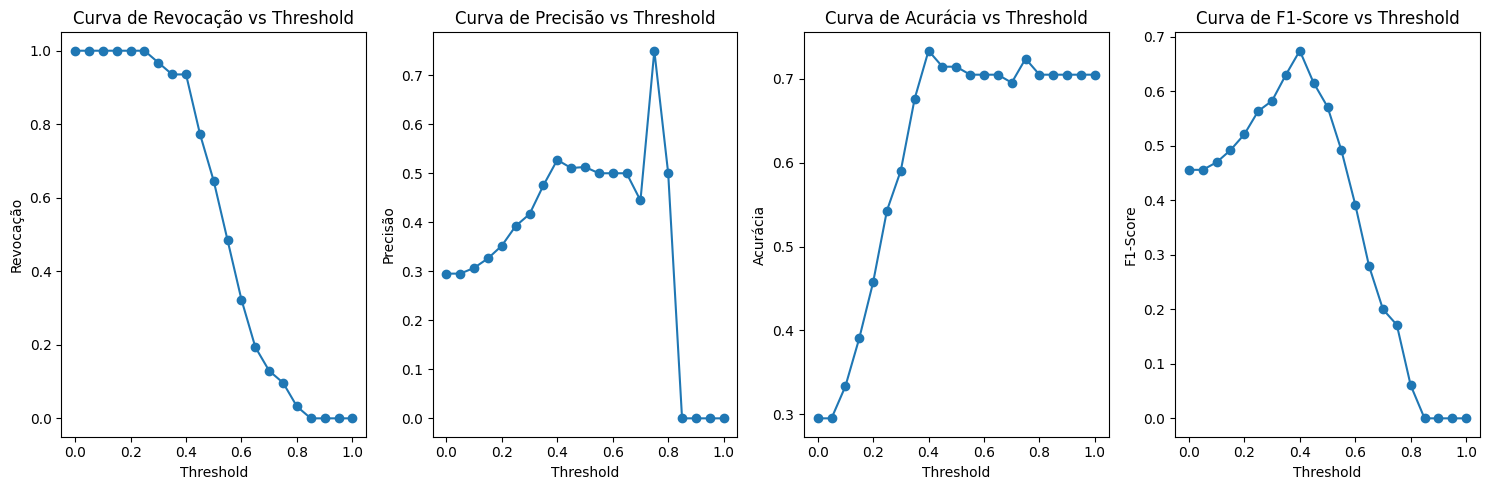

In [15]:
# Definindo uma lista de thresholds (de 0 a 1 com incremento de 0.05)
thresholds = np.arange(0.0, 1.05, 0.05)

# Inicializando listas para armazenar precisão, revocação e acurácia
precisions = []
recalls = []
accuracies = []
f1_scores = []

# Calculando precisão, revocação e acurácia para diferentes thresholds
for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_threshold))
    recalls.append(recall_score(y_test, y_pred_threshold))
    accuracies.append(accuracy_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold))
    
# Criando os gráficos
plt.figure(figsize=(15, 5))

# Gráfico da Revocação
plt.subplot(1, 4, 1)
plt.plot(thresholds, recalls, marker='o')
plt.title('Curva de Revocação vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Revocação')

# Gráfico da Precisão
plt.subplot(1, 4, 2)
plt.plot(thresholds, precisions, marker='o')
plt.title('Curva de Precisão vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Precisão')

# Gráfico da Acurácia
plt.subplot(1, 4, 3)
plt.plot(thresholds, accuracies, marker='o')
plt.title('Curva de Acurácia vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Acurácia')

# Gráfico do F1-Score
plt.subplot(1, 4, 4)
plt.plot(thresholds, f1_scores, marker='o')
plt.title('Curva de F1-Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')


# Exibindo os gráficos
plt.tight_layout()
plt.show()

## Curva ROC (Receiver Operating Characteristic)

A **Curva ROC** é uma ferramenta gráfica usada para avaliar a performance de classificadores binários em diferentes thresholds (pontos de corte). Ela plota a relação entre a **taxa de verdadeiros positivos** (revocação) e a **taxa de falsos positivos**, permitindo uma análise detalhada do desempenho do classificador.

### Definições

- **Taxa de Verdadeiros Positivos (True Positive Rate - TPR)**: Também conhecida como **revocação**, ela mede a proporção de exemplos positivos corretamente classificados:
  
  $$
  \text{TPR} = \frac{VP}{VP + FN}
  $$

- **Taxa de Falsos Positivos (False Positive Rate - FPR)**: Mede a proporção de exemplos negativos que foram incorretamente classificados como positivos:
  
  $$
  \text{FPR} = \frac{FP}{FP + VN}
  $$

### Interpretação da Curva ROC

- A **Curva ROC** começa no ponto (0,0) e vai até (1,1). Quanto mais a curva se aproxima do canto superior esquerdo, melhor o desempenho do classificador.
- Um **classificador perfeito** teria uma curva que sobe verticalmente até o ponto (0,1) e, em seguida, se move horizontalmente até o ponto (1,1).
- Um **classificador aleatório** teria uma linha diagonal entre os pontos (0,0) e (1,1), o que indica que ele não está distinguindo corretamente entre as classes.

### Área Sob a Curva (AUC - Area Under the Curve)

A **AUC** representa a área sob a curva ROC e varia de 0 a 1. Um valor de AUC mais próximo de 1 indica que o classificador tem um bom desempenho, enquanto um valor próximo de 0.5 indica que o classificador está apenas "chutando".

- **AUC = 1**: Classificador perfeito.
- **AUC = 0.5**: Classificador aleatório.
- **AUC < 0.5**: O modelo é pior que um classificador aleatório.


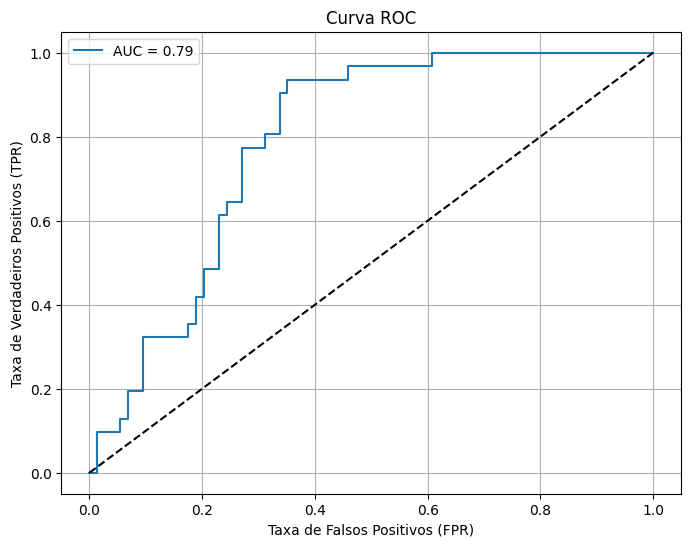

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculando a AUC
auc = roc_auc_score(y_test, y_prob)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal (classificador aleatório)
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Abrir: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc